In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [70]:
data_path = "../features_engineering/features.csv"
business_path = '../city_filter/businesses_Indianapolis.csv'
df = pd.read_csv(data_path)
df.head()

,business_id,stars,review_count,attr_score,cat_score,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,...,review_burst_score_scaled,avg_user_avg_stars,elite_user_ratio,avg_user_account_age_days,avg_user_review_count_log_scaled,avg_user_useful_log_scaled,avg_user_funny_log_scaled,avg_user_cool_log_scaled,avg_user_fans_log_scaled,avg_user_compliments_log_scaled
0,il_Ro8jwPlHresjw9EGmBg,-1.132288,-0.212222,6.5,1.670499,2.413793,0.776556,0.448276,0.379310,0.172414,...,-0.127174,3.072069,0.172414,-0.875370,-0.819606,-0.778717,-1.033356,-0.647838,-0.889185,-0.525681
1,qhDdDeI3K4jy2KyzwFN53w,0.383586,-0.121393,0.0,1.000000,4.052632,-0.294102,0.605263,0.078947,0.315789,...,-0.149158,4.029737,0.631579,1.144675,1.419795,1.500704,1.589323,1.493492,1.751805,1.518337
2,kfNv-JZpuN6TVNSO6hHdkw,0.383586,-0.284884,2.5,1.000000,3.950000,0.515631,0.750000,0.100000,0.150000,...,1.585918,4.003500,0.250000,-1.674202,0.135378,-0.065015,-0.173017,-0.074152,-0.423573,-0.281522
3,x1mhq4IpWctQOBM06dU8vg,-2.142871,-0.239470,0.5,1.692475,1.600000,0.036412,0.280000,0.600000,0.120000,...,-0.125364,2.148800,0.040000,-1.743473,-1.965375,-1.567713,-1.487938,-1.922442,-1.315666,-1.999048
4,seKihQKpGGnCeLuELRQPSQ,-0.121706,1.867748,5.5,2.185136,3.333333,0.525084,0.518519,0.211111,0.270370,...,-0.132857,3.611852,0.255556,-0.321709,0.125148,0.827640,0.988959,1.010086,-0.197925,0.322949


## 1. cluster directly

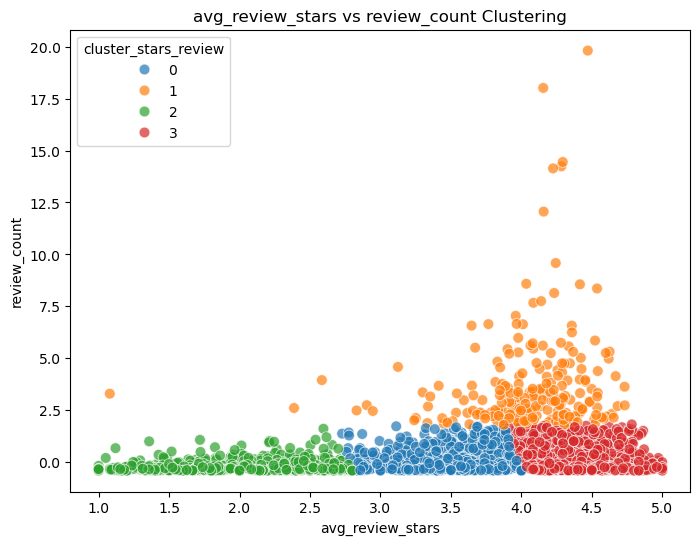

In [71]:
# Step 1: 提取
X1 = df[['avg_review_stars', 'review_count']].copy()

# # Step 2: 标准化
# scaler1 = StandardScaler()
# X1_scaled = scaler1.fit_transform(X1)

# Step 3: 聚类
kmeans1 = KMeans(n_clusters=4, random_state=0)
df['cluster_stars_review'] = kmeans1.fit_predict(X1)

# Step 4: 可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_review_stars', y='review_count', hue='cluster_stars_review', palette='tab10', s=60, alpha=0.7, edgecolor='w')
plt.title('avg_review_stars vs review_count Clustering')
plt.show()

## 2. cluster deeply

In [72]:
features_for_clustering = [
    'attr_score', 'cat_score',
    'std_review_stars_scaled',
    'pos_review_ratio', 'neg_review_ratio', 'neu_review_ratio',
    'long_review_ratio', 'avg_review_length_scaled', 'avg_word_count_scaled',
    'avg_useful_scaled', 'avg_funny_scaled', 'avg_cool_scaled',
    'interact_score_mean_scaled', 'sentiment_score_mean_scaled',
    'recent_review_ratio', 'review_timespan_days_scaled', 'review_burst_score_scaled',
    'avg_user_avg_stars', 'elite_user_ratio', 'avg_user_account_age_days',
    'avg_user_review_count_log_scaled', 'avg_user_useful_log_scaled',
    'avg_user_funny_log_scaled', 'avg_user_cool_log_scaled',
    'avg_user_fans_log_scaled', 'avg_user_compliments_log_scaled'
]

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取特征
X = df[features_for_clustering].copy()

# 检查NaN
print(X.isna())

      attr_score  cat_score  std_review_stars_scaled  pos_review_ratio  \
0          False      False                    False             False   
1          False      False                    False             False   
2          False      False                    False             False   
3          False      False                    False             False   
4          False      False                    False             False   
...          ...        ...                      ...               ...   
5330       False      False                    False             False   
5331       False      False                    False             False   
5332       False      False                    False             False   
5333       False      False                    False             False   
5334       False      False                    False             False   

      neg_review_ratio  neu_review_ratio  long_review_ratio  \
0                False             False        

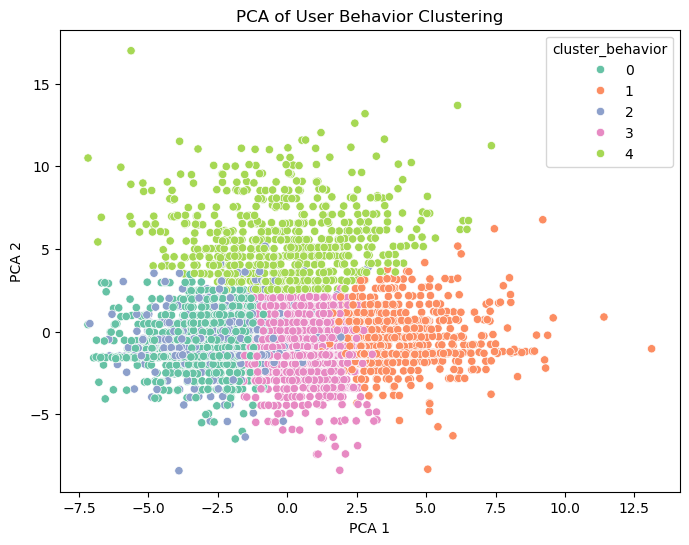

In [74]:


# # 2. 标准化
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 3. 聚类（k 可以调）
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_behavior'] = kmeans.fit_predict(X)

# 4. 降维可视化（PCA）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. 可视化
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster_behavior'], palette='Set2')
plt.title("PCA of User Behavior Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [75]:
# 补充字段建议：添加 review_count_log（如你前面没加可以先 log1p 一下）
# df['review_count_log'] = np.log1p(df['review_count'])

# 聚类群体平均画像
cluster_summary = df.groupby('cluster_behavior')[[
    'avg_review_stars',
    'review_count',
    'interact_score_mean_scaled',
    'sentiment_score_mean_scaled',
    'review_burst_score_scaled',
    'recent_review_ratio'
]].mean().round(3)

# 查看每类聚类的商家数量
cluster_counts = df['cluster_behavior'].value_counts().sort_index()

# 合并数量列
cluster_summary['sample_size'] = cluster_counts.values
cluster_summary


,avg_review_stars,review_count,interact_score_mean_scaled,sentiment_score_mean_scaled,review_burst_score_scaled,recent_review_ratio,sample_size
cluster_behavior,,,,,,,
0,3.583,-0.300,-0.727,-0.005,0.019,0.183,1182
1,4.109,-0.111,1.047,0.396,0.185,0.157,860
2,2.638,-0.296,0.770,-0.951,-0.120,0.118,533
3,3.677,0.268,-0.186,0.098,-0.073,0.121,2083
4,3.600,0.074,-0.093,-0.046,0.053,0.152,677


In [76]:
cluster_summary.to_csv('cluster_summary.csv', index=True)

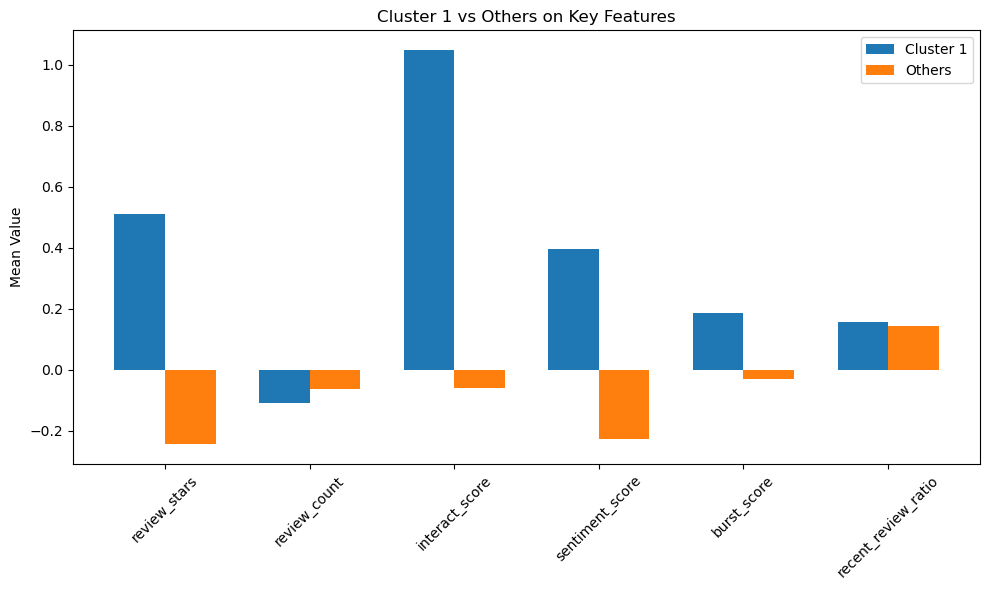

In [90]:
import matplotlib.pyplot as plt

scaler = StandardScaler()
df['avg_review_stars_scaled'] = scaler.fit_transform(df[['avg_review_stars']])

# 选定的关键维度
columns_to_plot = [
    'avg_review_stars_scaled', 'review_count',
    'interact_score_mean_scaled', 'sentiment_score_mean_scaled',
    'review_burst_score_scaled', 'recent_review_ratio'
]

show_columns = ['review_stars','review_count','interact_score','sentiment_score','burst_score','recent_review_ratio']


# 计算均值表
mean_by_cluster = df.groupby('cluster_behavior')[columns_to_plot].mean()

# 对比 cluster 1 与其他平均值
cluster_1 = mean_by_cluster.loc[1]
others = mean_by_cluster.drop(index=1).mean()

# 绘图
x = range(len(columns_to_plot))
plt.figure(figsize=(10, 6))
plt.bar(x, cluster_1.values, width=0.35, label='Cluster 1', align='center')
plt.bar([i + 0.35 for i in x], others.values, width=0.35, label='Others', align='center')
plt.xticks([i + 0.175 for i in x], show_columns, rotation=45)
plt.ylabel('Mean Value')
plt.title('Cluster 1 vs Others on Key Features')
plt.legend()
plt.tight_layout()
plt.show()


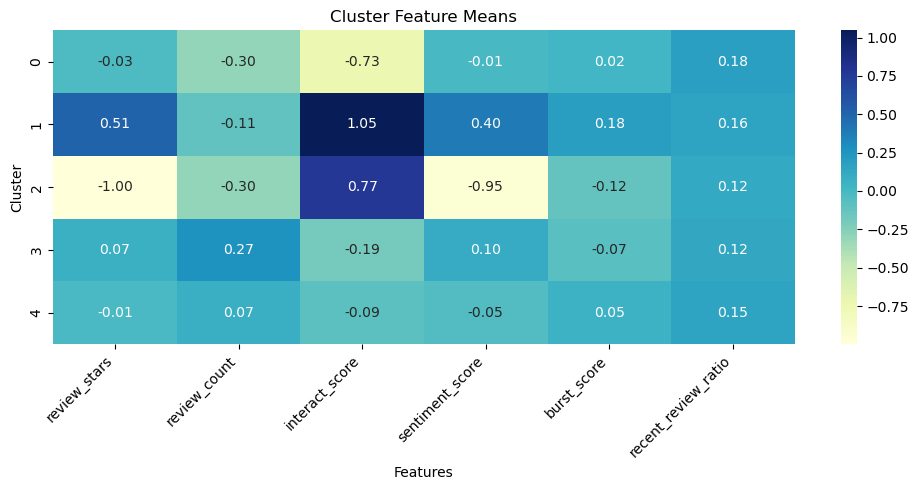

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(mean_by_cluster, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster Feature Means')
heatmap.set_xticklabels(show_columns, rotation=45, horizontalalignment='right')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# 定义条件：高评分 + 评论不多 + 情感积极 + 高互动
gem_candidates = df[
    (df['cluster_behavior'] == 1) &
    (df['avg_review_stars'] >= 4.0) &
    (df['review_count'] < df['review_count'].quantile(0.3)) &  # 比较冷门，在 30% 分位数以下
    (df['sentiment_score_mean_scaled'] > 0) &
    (df['interact_score_mean_scaled'] > 0)
]


In [93]:
# 初始化标签列
df['gem_label'] = 0
df.loc[gem_candidates.index, 'gem_label'] = 1

df_gem = pd.read_csv(data_path)
df_gem['gem_label'] = df['gem_label']
df_gem.to_csv('gem_candidates.csv', index=False)

In [94]:
# 打印一下gem的数量
gem_count = df['gem_label'].sum()
print(f"Number of GEM candidates: {gem_count}")

Number of GEM candidates: 135


In [96]:
# 打印gem商家columns_to_plot列和其他商家的平均值的summary
mean_by_gem = df.groupby('gem_label')[columns_to_plot].mean()
mean_by_gem.columns = show_columns
mean_by_gem = mean_by_gem.rename(index={0: 'Non-GEM', 1: 'GEM'})
mean_by_gem

,review_stars,review_count,interact_score,sentiment_score,burst_score,recent_review_ratio
gem_label,,,,,,
Non-GEM,-0.026061,0.010537,-0.040532,-0.022757,-0.015325,0.143573
GEM,1.003814,-0.405854,1.561227,0.876569,0.590293,0.157163


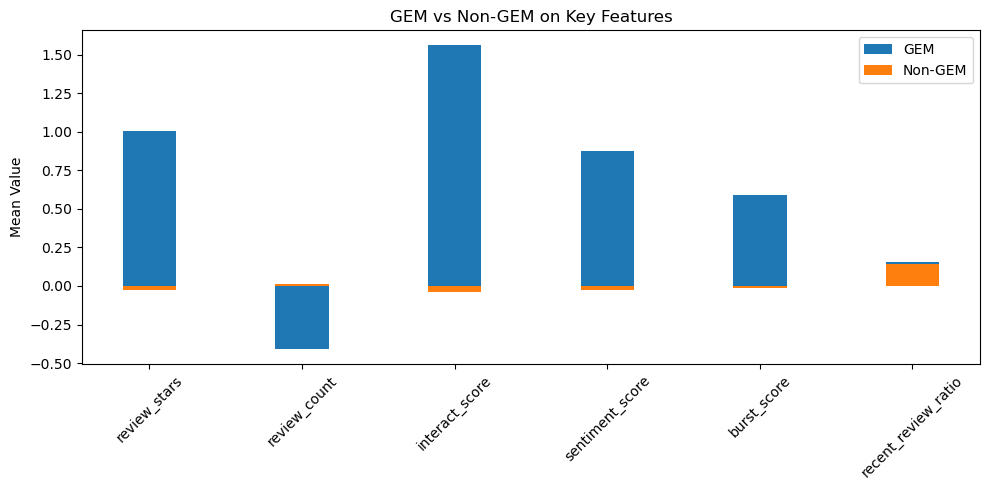

In [97]:
# 可视化柱状图
plt.figure(figsize=(10, 5))
plt.bar(mean_by_gem.columns, mean_by_gem.loc['GEM'], width=0.35, label='GEM', align='center')
plt.bar(mean_by_gem.columns, mean_by_gem.loc['Non-GEM'], width=0.35, label='Non-GEM', align='center')
plt.ylabel('Mean Value')
plt.title('GEM vs Non-GEM on Key Features')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()